<a href="https://colab.research.google.com/github/abakm/AL-ML_Assignment-1/blob/master/case_study01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Load the dataset in Python environment

In [3]:
import pandas as pd # import pandas module

df = pd.read_csv('./train_loan.csv') # read the csv file

print(df) # print dataframe


      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

### 2. Perform different preprocessing steps

### a. Missing value handling


In [4]:
df.isnull().sum() # check for missing values
# Missing value handling is done by following values

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


### a.1 Fill missing values with a specific value (e.g., 'Unknown' for text, 0 for numbers)

In [5]:
fill_na_df = df.fillna({
    "Dependents":0,
    "LoanAmount":0,
    "Loan_Amount_Term":0,
    "Gender": "Unknown",
    "Married": "Unknown",
    "Self_Employed":  "Unknown",
    "Credit_History":0
})
# fill missing values with 'Unknown for text and 0 for numeric'
print(fill_na_df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         0.0           

### a.2 Drop rows with any missing value

In [7]:
df=df.dropna() # drop rows with any missing value
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0           

### b. Outlier detection

### b.1.Sorting method

In [12]:
df['ApplicantIncome'].sort_values() # sort the ApplicantIncom

# here 150 and 81000 are the outlier

,ApplicantIncome
216,150
500,645
77,1000
418,1025
14,1299
...,...
183,33846
443,37719
185,39147
155,39999


### b.2 Data Visualization Method

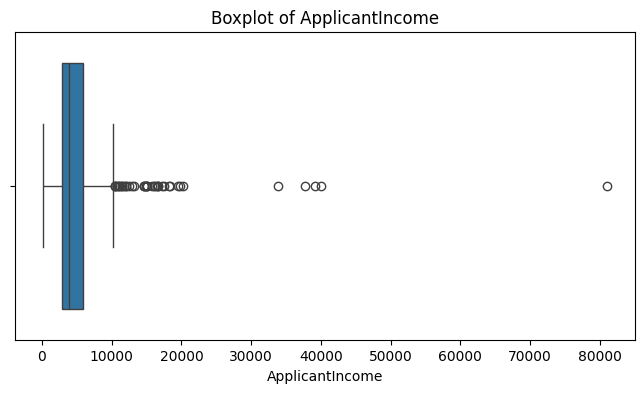

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.boxplot(x=df['ApplicantIncome'])
plt.title("Boxplot of ApplicantIncome")
plt.show()

For the visualization method its clear that the outleirs are 150 and 81200 so that we can handle those


In [15]:
# Replace outliers (greater than 39999) in column ApplicantIncome with median value

import numpy as np
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] > 39999, df['ApplicantIncome'].median(), df['ApplicantIncome'])
print(df['ApplicantIncome'])

1      4583.0
2      3000.0
3      2583.0
4      6000.0
5      5417.0
        ...  
609    2900.0
610    4106.0
611    8072.0
612    7583.0
613    4583.0
Name: ApplicantIncome, Length: 480, dtype: float64


### c. Encoding

There are two types are
1. Label Encoding
2. One-Hot Encoding

### c.1.Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'Property_Area' column
df["Property_Area_label"] = label_encoder.fit_transform(df["Property_Area"])
print(df['Property_Area_label'])

1      0
2      2
3      2
4      2
5      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area_label, Length: 480, dtype: int64


### c.2 One-Hot Encoding

In [17]:
# Apply One-Hot Encoding to the 'Property_Area' column
one_host_encoded =  pd.get_dummies(df["Property_Area"], prefix="Property_Area")

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_host_encoded], axis=1)
print("\nDataFrame after One-Hot Encoding the 'Property_Area'")
print(df)





DataFrame after One-Hot Encoding the 'Property_Area'
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1       

### d. Scaling

### d.1.	Min-Max Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()
columns = df.select_dtypes(include=['number']).columns.tolist()


# Apply Min-Max Scaling to the DataFrame for numeric columns
df_min_max_scaled = pd.DataFrame(scaler.fit_transform(df[columns]))
print(df_min_max_scaled)

            0         1         2         3    4    5
0    0.111245  0.044567  0.201354  0.729730  1.0  0.0
1    0.071520  0.000000  0.096447  0.729730  1.0  1.0
2    0.061055  0.069687  0.187817  0.729730  1.0  1.0
3    0.146804  0.000000  0.223350  0.729730  1.0  1.0
4    0.132174  0.124006  0.436548  0.729730  1.0  1.0
..        ...       ...       ...       ...  ...  ...
475  0.069011  0.000000  0.104907  0.729730  1.0  0.0
476  0.099275  0.000000  0.052453  0.324324  1.0  0.0
477  0.198800  0.007093  0.412860  0.729730  1.0  1.0
478  0.186529  0.000000  0.301184  0.729730  1.0  1.0
479  0.111245  0.000000  0.209814  0.729730  0.0  0.5

[480 rows x 6 columns]
